# Analysis of user collection

In this notebook, the retrieved results of the user collection is analyzed.

In [1]:
import glob
import time
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
fp_figs = Path("figs")
fp_figs = 

## User collection files

In [3]:
data_files = glob.glob("methods/*/results/*.csv")

data_files

['methods/papers_with_code/results/ids_paperswithcode.csv',
 'methods/github_search/results/ids_search_repos.csv',
 'methods/github_search/results/ids_search_users.csv',
 'methods/github_search/results/ids_topic_repos.csv',
 'methods/university_profile_pages/results/employees_github_usernames.csv',
 'methods/pure/results/ids_pure_users.csv']

## Dataset
The data contains the source where the GitHub user id is found, the GitHub user id and university id if it is available.

In [4]:
df_github_names_long = pd.concat(
    [ pd.read_csv(fp) for fp in data_files], 
    axis=0, 
    keys=data_files, 
    names=["source", "row"]
).reset_index("source").reset_index(drop=True)
df_github_names_long

,source,github_user_id,uu_user_id
0,methods/papers_with_code/results/ids_paperswit...,MarcelRobeer,NaN
1,methods/papers_with_code/results/ids_paperswit...,YevgenyW,NaN
2,methods/papers_with_code/results/ids_paperswit...,puregome,NaN
3,methods/papers_with_code/results/ids_paperswit...,AI4Finance-LLC,NaN
4,methods/papers_with_code/results/ids_paperswit...,AI4Finance-Foundation,NaN
...,...,...,...
553,methods/pure/results/ids_pure_users.csv,keesmulder,NaN
554,methods/pure/results/ids_pure_users.csv,RianneSchouten,NaN
555,methods/pure/results/ids_pure_users.csv,ydluo,NaN
556,methods/pure/results/ids_pure_users.csv,marnixnaber,NaN


### Retrieval count

The following results shows how many times user indentifiers are found with each retrieval method. This can be an indicator the findability of users. 

In [5]:
df_name_method_crosstab = pd.crosstab(
    df_github_names_long["github_user_id"],
    df_github_names_long["source"]
)
df_name_method_crosstab

source,methods/github_search/results/ids_search_repos.csv,methods/github_search/results/ids_search_users.csv,methods/github_search/results/ids_topic_repos.csv,methods/papers_with_code/results/ids_paperswithcode.csv,methods/pure/results/ids_pure_users.csv,methods/university_profile_pages/results/employees_github_usernames.csv
github_user_id,,,,,,
19910101bacon,0,0,0,1,0,0
19giorgosts,0,1,0,0,0,0
4009509,0,1,0,0,0,0
73616e646572,0,0,0,0,0,1
AI4Finance-Foundation,0,0,0,1,0,0
...,...,...,...,...,...,...
yaikohi,0,1,0,0,0,0
ydluo,0,0,0,0,1,0
ystouthart,1,0,1,0,0,0


The following example shows the findability of the ASReview project (project at Utrecht University).

In [6]:
df_name_method_crosstab.loc['asreview']

source
methods/github_search/results/ids_search_repos.csv                         0
methods/github_search/results/ids_search_users.csv                         0
methods/github_search/results/ids_topic_repos.csv                          6
methods/papers_with_code/results/ids_paperswithcode.csv                    0
methods/pure/results/ids_pure_users.csv                                    0
methods/university_profile_pages/results/employees_github_usernames.csv    2
Name: asreview, dtype: int64

In [7]:
df_name_findability = (df_name_method_crosstab > 0).astype(int).sum(axis=1).sort_values(ascending=False)
df_name_findability

github_user_id
kevin4998            3
ekatrukha            3
J535D165             3
UU-Hydro             3
UtrechtUniversity    3
                    ..
SonicwaveNL          1
SolennWalstra        1
SiefBlok             1
SanliFaez            1
brentp               1
Length: 432, dtype: int64

In [8]:
df_method_findability = (df_name_method_crosstab > 0).astype(int).sum(axis=0).sort_values(ascending=False)
df_method_findability

source
methods/github_search/results/ids_search_users.csv                         224
methods/github_search/results/ids_search_repos.csv                         161
methods/university_profile_pages/results/employees_github_usernames.csv     55
methods/github_search/results/ids_topic_repos.csv                           11
methods/papers_with_code/results/ids_paperswithcode.csv                     11
methods/pure/results/ids_pure_users.csv                                     11
dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: 'figs/user_collection_user_findability.png'

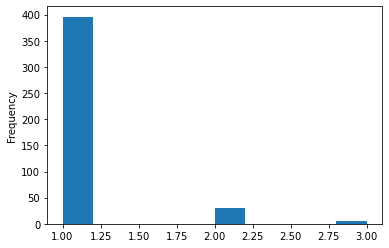

In [9]:
df_name_findability.plot.hist()
plt.savefig(Path(fp_figs, 'user_collection_user_findability.png'))

In [ ]:
df_method_findability.plot.bar()
plt.savefig(Path(fp_figs, 'user_collection_method_findability.png'))

In [ ]:
df_annotated_users = pd.read_excel(Path("results", "unique_users_annotated.xlsx"))
df_annotated_users[["github_user_id", "is_student", "is_employee", "is_currently_employed", "is_research_group", "final_decision"]]

In [ ]:
df_annotated_users_included = df_annotated_users[df_annotated_users["final_decision"] == 1]

In [ ]:
df_annotated_users_included.boxplot(column=['public_repos','public_gists', 'followers', 'following'])


In [ ]:
sns.boxplot(x=df_annotated_users_included['public_repos'], showfliers = False)
df_annotated_users_included.sort_values('public_repos', ascending=False).head(10)

In [ ]:
sns.boxplot(x=df_annotated_users_included['public_gists'])
df_annotated_users_included.sort_values('public_gists', ascending=False).head(10)

In [ ]:
sns.boxplot(x=df_annotated_users_included['followers'])
df_annotated_users_included.sort_values('followers', ascending=False).head(10)

In [ ]:
sns.boxplot(x=df_annotated_users_included['following'], showfliers = False)
df_annotated_users_included.sort_values('following', ascending=False).head(10)
